This file contains the second portion of the CTSI example code. It explores the 
OMOP database and completes a full dataset analysis for the patient cohort.

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the unprocessed dataframe
df = pd.read_csv('df_unprocessed.csv')
df.set_index('person_id',inplace=True)

In [3]:
## PATIENT DEMOGRAPHICS ANALYSIS
# copy patient demographic variables to temp dataframe
df_patient = df.iloc[:,:4]
# Basic Statistics Table
df_patient.describe(include='all')

,gender,race,ethnicity,age
count,7440,7440,7440,7440.000000
unique,3,5,2,NaN
top,FEMALE,White,Not Hispanic or Latino,NaN
freq,5074,6001,7382,NaN
mean,NaN,NaN,NaN,46.600672
std,NaN,NaN,NaN,13.077517
min,NaN,NaN,NaN,18.000000
25%,NaN,NaN,NaN,36.000000
50%,NaN,NaN,NaN,47.000000
75%,NaN,NaN,NaN,58.000000


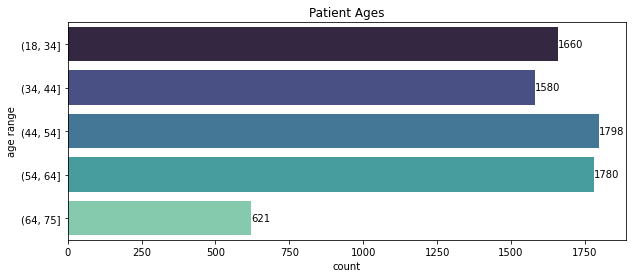

In [4]:
# Age - histogram
df_patient['age_range'] = pd.cut(df_patient['age'],
                    bins=[18,34,44,54,64,75])
fig,ax = plt.subplots(figsize=(10,4))
sns.countplot(data=df_patient,y='age_range',palette='mako')
ax.tick_params(axis='y')
plt.ylabel('age range')
plt.title('Patient Ages')
ax.bar_label(ax.containers[0])
plt.show()

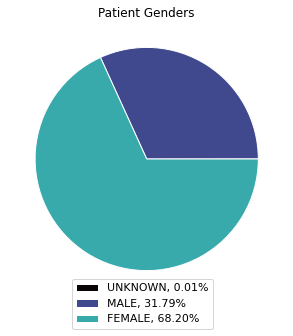

In [5]:
# Gender - pie subchart
# create dictionary of value counts
gender_sums = df_patient['gender'].value_counts()
gender_dict = gender_sums.to_dict()
# sort dictionary for plotting
gender_sorted_dict = {k: v for k, v in sorted(gender_dict.items(), key=lambda item: item[1])}
# convert to lists
labels = list(gender_sorted_dict.keys())
values = list(gender_sorted_dict.values())

fig, ax = plt.subplots(figsize=(5, 5))

ax.axis('equal')
 
theme = sns.color_palette("mako", as_cmap=True)
ax.set_prop_cycle("color", [theme(1. * i / len(values)) for i in range(len(values))])

_, _ = ax.pie(values, startangle=0, wedgeprops = {"edgecolor" : "white",
                                                  'linewidth': 1,
                                                  'antialiased': True})

 
total = sum(values)
plt.title('Patient Genders')
plt.legend(
    loc='center',
    labels=['%s, %1.2f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels,values)],
    prop={'size': 11},
    bbox_to_anchor=(0.5, 0.1),
    bbox_transform=fig.transFigure
)
 
plt.show()

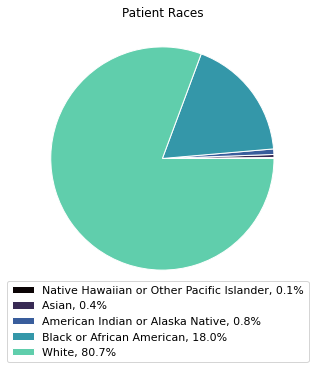

In [6]:
# Race - pie subchart
# create dictionary of value counts
race_sums = df_patient['race'].value_counts()
race_dict = race_sums.to_dict()
# sort dictionary for plotting
race_sorted_dict = {k: v for k, v in sorted(race_dict.items(), key=lambda item: item[1])}
# convert to lists
labels = list(race_sorted_dict.keys())
values = list(race_sorted_dict.values())

fig, ax = plt.subplots(figsize=(5, 5))

ax.axis('equal')
 
theme = sns.color_palette("mako", as_cmap=True)
ax.set_prop_cycle("color", [theme(1. * i / len(values)) for i in range(len(values))])

_, _ = ax.pie(values, startangle=0, wedgeprops = {"edgecolor" : "white",
                                                  'linewidth': 1,
                                                  'antialiased': True})

total = sum(values)
plt.title('Patient Races')
plt.legend(
    loc='center',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels,values)],
    prop={'size': 11},
    bbox_to_anchor=(0.5,0.05),
    bbox_transform=fig.transFigure
)
 
plt.show()

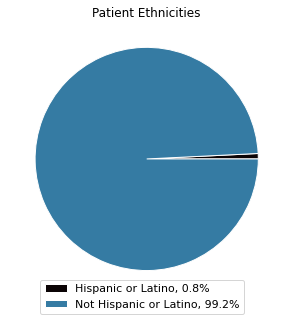

In [7]:
# Ethnicity - pie subchart
# create dictionary of value counts
ethnicity_sums = df_patient['ethnicity'].value_counts()
ethnicity_dict = ethnicity_sums.to_dict()
# sort dictionary for plotting
ethnicity_sorted_dict = {k: v for k, v in sorted(ethnicity_dict.items(), key=lambda item: item[1])}
# convert to lists
labels = list(ethnicity_sorted_dict.keys())
values = list(ethnicity_sorted_dict.values())

fig, ax = plt.subplots(figsize=(5, 5))

ax.axis('equal')

theme = sns.color_palette("mako", as_cmap=True)
ax.set_prop_cycle("color", [theme(1. * i / len(values)) for i in range(len(values))])

_, _ = ax.pie(values, startangle=0, wedgeprops = {"edgecolor" : "white",
                                                  'linewidth': 1,
                                                  'antialiased': True})
 
total = sum(values)
plt.title('Patient Ethnicities')
plt.legend(
    loc='center',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels,values)],
    prop={'size': 11},
    bbox_to_anchor=(0.5, 0.12),
    bbox_transform=fig.transFigure
)
 
plt.show()

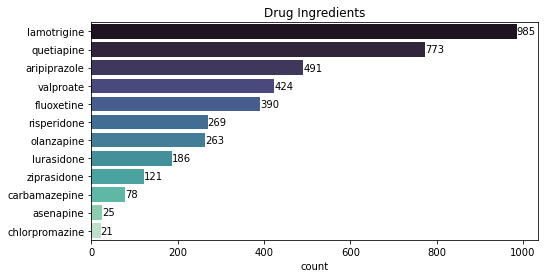

In [8]:
## DRUG INGREDIENT ANALYSIS
# create dataframe of the counts
drug_sums = pd.DataFrame(df['ingredient'].value_counts())
drug_sums = drug_sums.iloc[1:,:]
# create bar chart
fig,ax = plt.subplots(figsize=(8,4))
sns.barplot(y = drug_sums.index,x = drug_sums['ingredient'],palette='mako')
plt.title('Drug Ingredients')
plt.xlabel('count')
ax.bar_label(ax.containers[0])
plt.show()

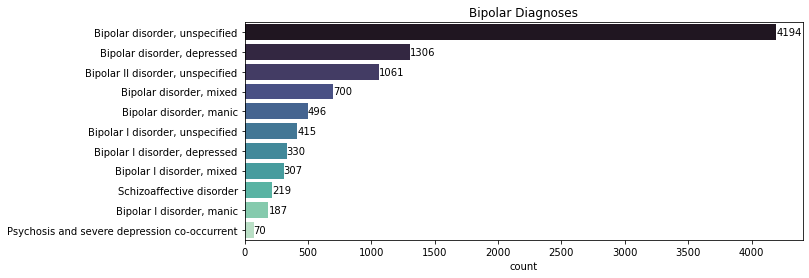

In [9]:
## BIPOLAR DISORDER ANALYSIS
# create dataframe of the counts
bd_sums = df.iloc[:,5:16].sum(axis=0)
bd_sums.sort_values(ascending=False,inplace=True)
# create bar chart
fig,ax = plt.subplots(figsize=(10,4))
sns.barplot(y = bd_sums.index,x = bd_sums,palette='mako')
plt.title('Bipolar Diagnoses')
plt.xlabel('count')
ax.bar_label(ax.containers[0])
plt.show()

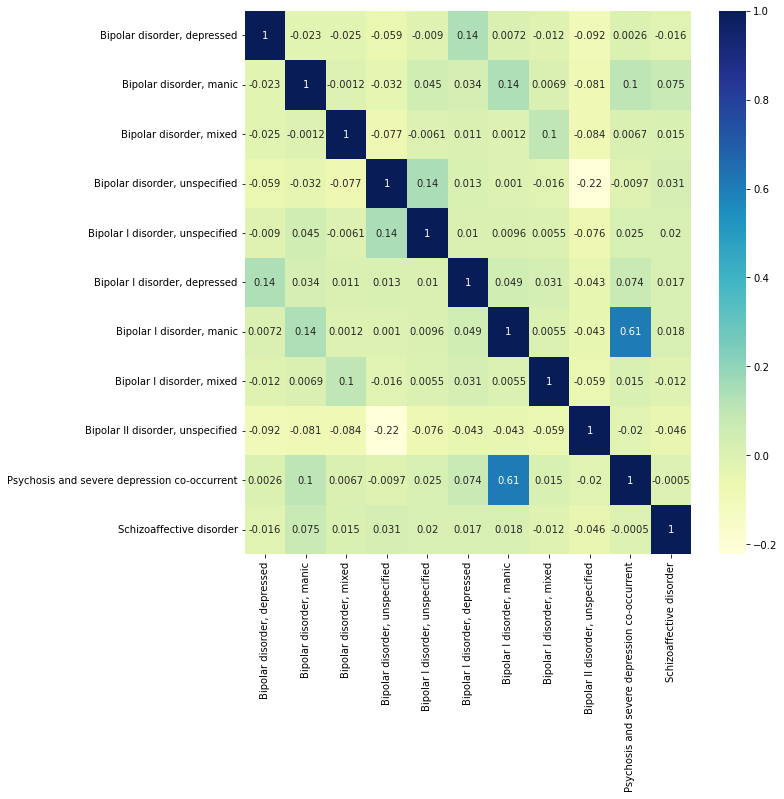

In [10]:
# BD correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,5:16].corr(),annot=True,cmap='YlGnBu')
plt.show()

<AxesSubplot:>

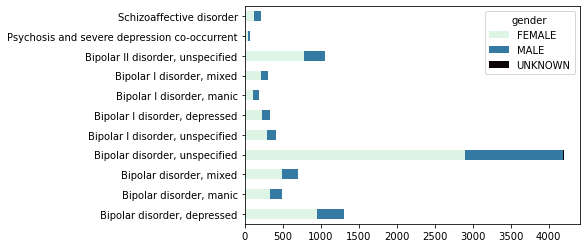

In [11]:
# CONDITION DISTRIBUTION BY GENDER
# create stacked barplot
df_BD = df.iloc[:,np.r_[0,5:16]]
df_BD.groupby('gender').sum().T.plot(kind='barh',stacked=True,colormap='mako_r')

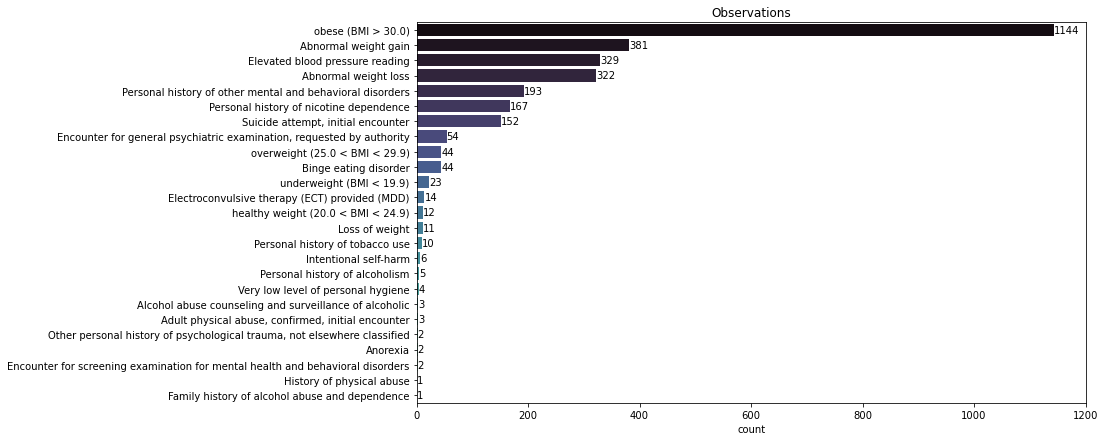

In [12]:
## OBSERVATION TYPE ANALYSIS
# count the number of patients with each disorder
obs_sums = df.iloc[:,16:41].sum(axis=0)
obs_sums.sort_values(ascending=False,inplace=True)
# create bar chart
fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(y = obs_sums.index,x = obs_sums,palette='mako')
plt.title('Observations')
plt.xlabel('count')
ax.bar_label(ax.containers[0])
plt.show()

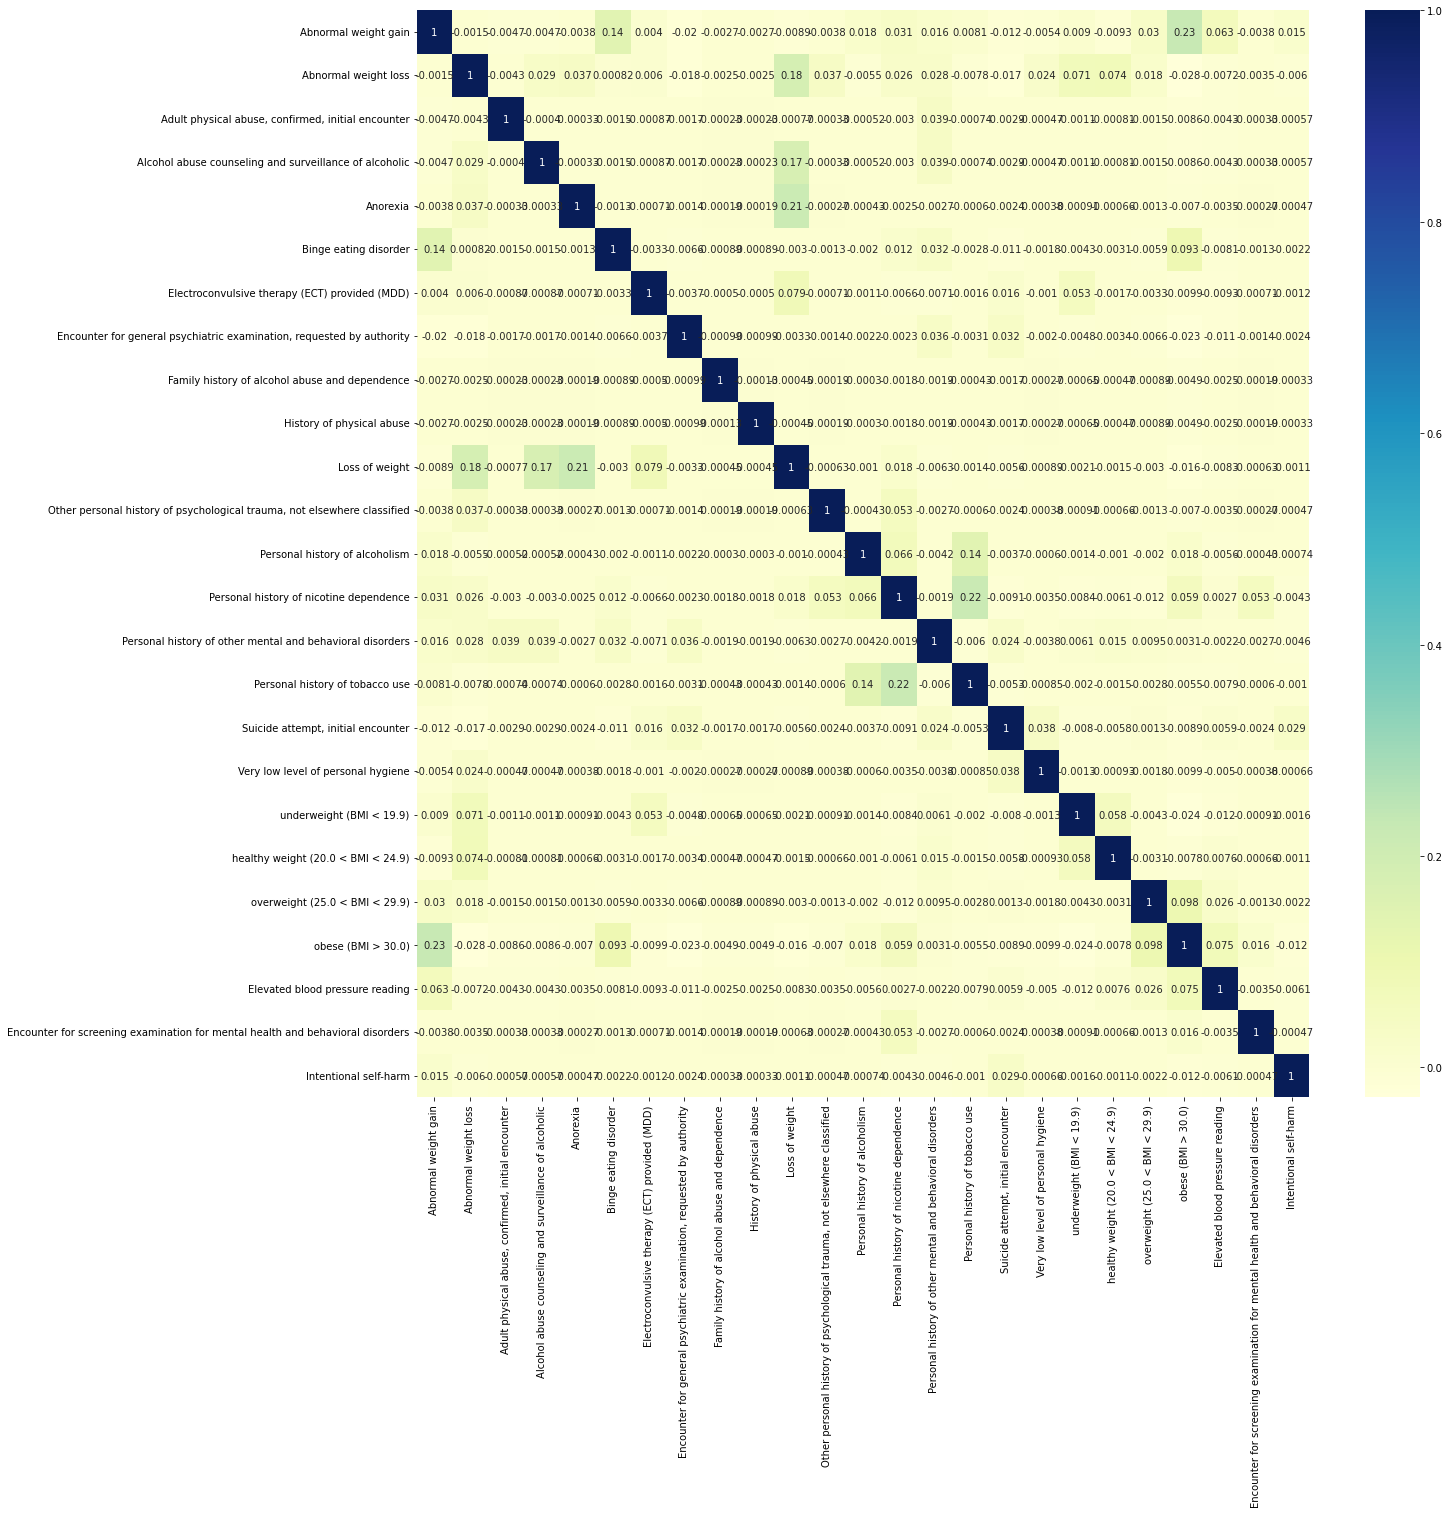

In [13]:
# obseravtion correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,16:41].corr(),annot=True,cmap='YlGnBu')
plt.show()

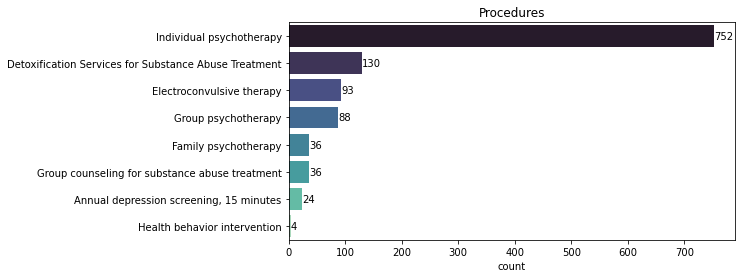

In [14]:
## PROCEDURE TYPE ANALYSIS
# count the number of patients with each disorder
pro_sums = df.iloc[:,41:49].sum(axis=0)
pro_sums.sort_values(ascending=False,inplace=True)
# create bar chart
fig,ax = plt.subplots(figsize=(8,4))
sns.barplot(y = pro_sums.index,x = pro_sums,palette='mako')
plt.title('Procedures')
plt.xlabel('count')
ax.bar_label(ax.containers[0])
plt.show()

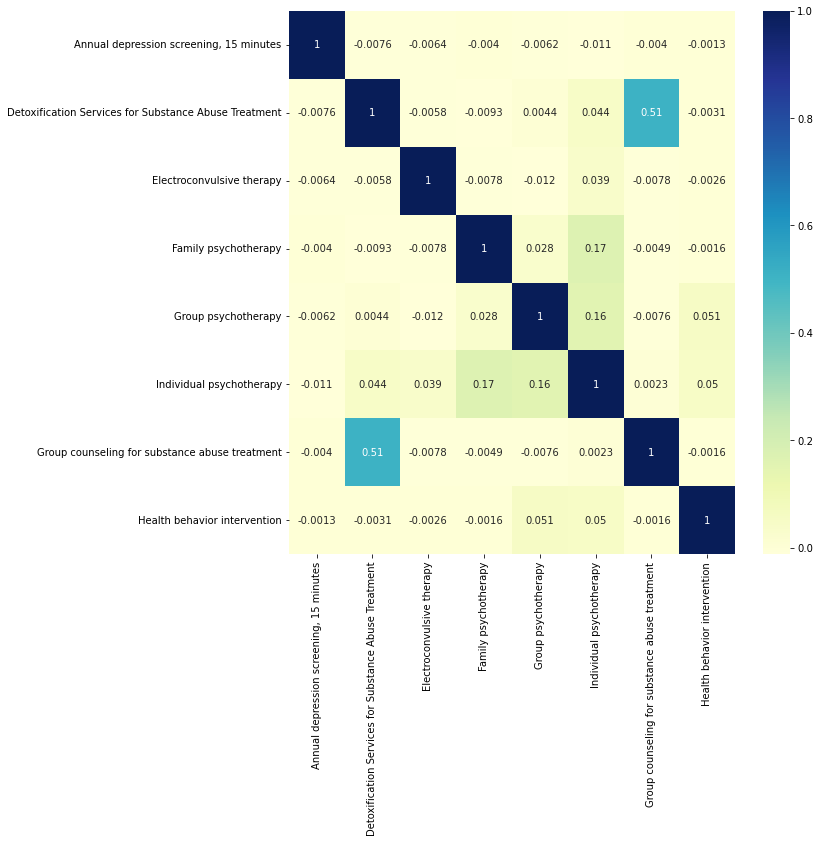

In [15]:
# procedure correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,41:49].corr(),annot=True,cmap='YlGnBu')
plt.show()

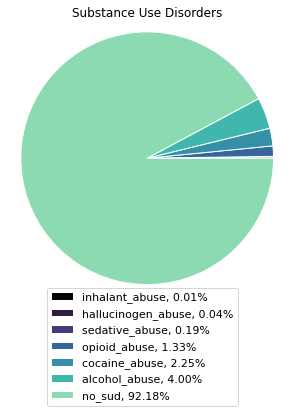

In [16]:
## SUBSTANCE USE DISORDER ANALYSIS
# count the number of patients with each disorder
sud_sums = df.iloc[:,49:].sum(axis=0)
# create a dictionary of the counts
sud_dict = sud_sums.to_dict()
# count the number of patients without an SUD
sud_dict['no_sud'] = len(df.iloc[:,49:].isnull())
# sort dictionary for plotting
sud_sorted_dict = {k: v for k, v in sorted(sud_dict.items(), key=lambda item: item[1])}
# add dictionary keys/values to list for plotting
labels = list(sud_sorted_dict.keys())
values = list(sud_sorted_dict.values())

# pie chart of the disorder counts
fig1, ax1 = plt.subplots(figsize=(5,5))

theme = sns.color_palette("mako", as_cmap=True)
ax1.set_prop_cycle("color", [theme(1. * i / len(values)) for i in range(len(values))])

_, _ = ax1.pie(values, startangle=0, wedgeprops = {"edgecolor" : "white",
                                                  'linewidth': 1,
                                                  'antialiased': True})

ax1.axis('equal')

total = sum(values)
plt.legend(
    loc='center',
    labels=['%s, %1.2f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    prop={'size': 11},
    bbox_to_anchor=(0.5, -0.02),
    bbox_transform=fig1.transFigure
)
plt.title('Substance Use Disorders')
plt.show()